In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [131]:

file_path = "D:\Desktop\Sem 3\ANLP\TextAnalysis\Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0])
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1])
cc_df = pd.read_excel(file_path, sheet_name=sheets[4])
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2])
st_df = pd.read_excel(file_path, sheet_name=sheets[5])
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3])
tt_df = pd.read_excel(file_path, sheet_name=sheets[6])


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\2545082455.py:1: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Desktop\Sem 3\ANLP\TextAnalysis\Australian Skills Classification - December 2023.xlsx"


In [132]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
]

for name, df in df_list:
    print(f"{name} columns: {df.columns.tolist()}")


occupation_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
cc_desc_df columns: ['Core Competency', 'Core Competency Description', 'Score', 'Proficiency Level', 'Anchor Value']
cc_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level', 'Anchor Value']
st_hier_df columns: ['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
st_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Specialist Task', '% of time spent on task', 'Emerging/\nTrending Flag', 'Specialist Cluster', ' % of time spent on cluster', 'Cluster Family', '% of time spent on family', 'Skills Statement']
tt_hier_df columns: ['Technology Tool Category', 'Technology Tool Category Description', 'Technology Tool', 'Technology Tool Description', 'Technology Tool Extended Description']
tt_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Pro

In [133]:
#cc_merged_df = cc_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
#st_merged_df = st_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
#tt_merged_df = tt_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

for name, df in df_list:
    df[:] = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)



C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\202770300.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[:] = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [134]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if isinstance(text, str):  
        return " ".join(word for word in text.split() if word.lower() not in stop_words)
    return text  


for name, df in df_list:
    df[:] = df.applymap(remove_stopwords)

C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\835941706.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[:] = df.applymap(remove_stopwords)


In [135]:
for name, df in df_list:
    df.update(df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x))


C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\3019749839.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\3019749839.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\3019749839.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\3019749839.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp

In [136]:
for name, df in df_list:
    df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))

C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\4139690721.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\4139690721.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\4139690721.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\4139690721.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_12468\4139690721.py:2: Fu

### Occupation Df

In [137]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [138]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['anzsco 4' 'anzsco 6' 'specialisation' 'nec category occupation'
 'nec category']


In [139]:
print("There are",occupation_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 1178 different occupations listed


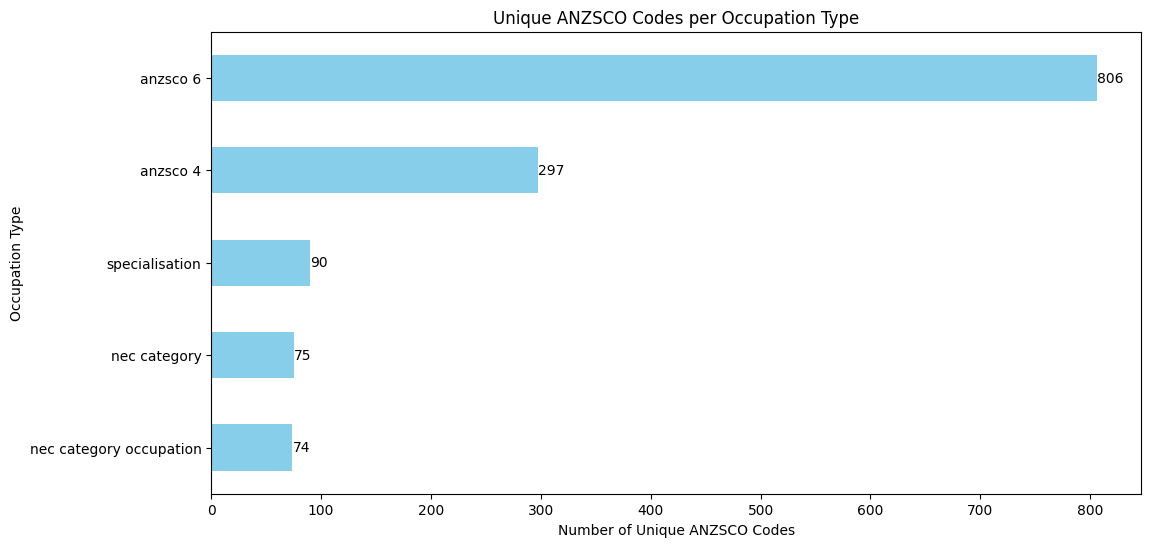

In [ ]:
import matplotlib.pyplot as plt


occupation_counts = occupation_df.groupby('Occupation Type')['ANZSCO Code'].nunique()


occupation_counts = occupation_counts.sort_values()


plt.figure(figsize=(12, 6))
ax = occupation_counts.plot(kind='barh', color='skyblue')


for index, value in enumerate(occupation_counts):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10)

plt.xlabel("Number of Unique ANZSCO Codes")
plt.ylabel("Occupation Type")
plt.title("Unique ANZSCO Codes per Occupation Type")
plt.show()


### Core Competency

In [141]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [142]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['digital engagement' 'initiative innovation' 'learning' 'numeracy'
 'oral communication' 'planning organising' 'problem solving' 'reading'
 'teamwork' 'writing']


In [143]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [144]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['anzsco 6' 'anzsco 4']
There are 1101 different occupations listed


In [145]:
cc_counts = cc_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


### ST

In [146]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 271
The number of Cluster Families in ASC data are: 30


In [147]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [148]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['anzsco 4' 'anzsco 6' 'specialisation' 'nec category occupation']
There are 1177 different occupations listed


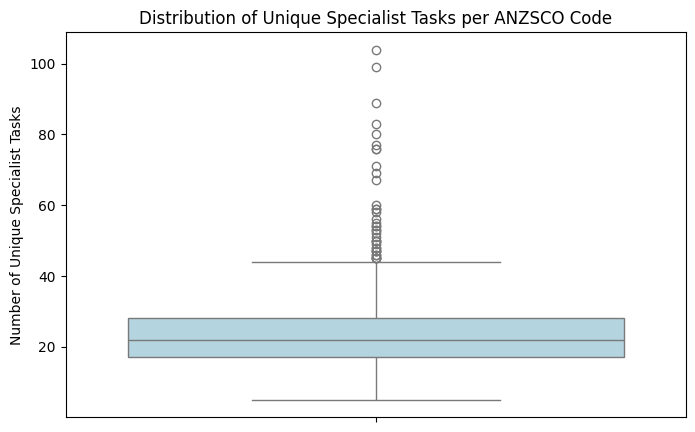

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby("ANZSCO Code")["Specialist Task"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")

# Show plot
plt.show()


In [150]:
# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = st_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              systems administrator   
1       313113                                  web administrator   
2       249212                    dance teacher (private tuition)   
3         2412                            primary school teachers   
4       241213                             primary school teacher   
5       263111                  computer network systems engineer   
6       322313                               welder (first class)   
7         2413  middle school teachers / intermediate school t...   
8       241311  middle school teacher / intermediate school te...   
9       262111                             database administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


In [151]:
import numpy as np

# Get counts of unique specialist tasks per ANZSCO Code
st_counts = st_df.groupby("ANZSCO Code")["Specialist Task"].nunique()

# Calculate IQR (Interquartile Range) to detect outliers
Q1 = np.percentile(st_counts, 25)  # First quartile (25th percentile)
Q3 = np.percentile(st_counts, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outliers as values greater than Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR
outliers = st_counts[st_counts > outlier_threshold].reset_index()

# Merge with ANZSCO Title to show meaningful names
top_outliers = outliers.merge(st_df[["ANZSCO Code", "ANZSCO Title"]].drop_duplicates(), on="ANZSCO Code")

# Sort by number of specialist tasks and display top 10
top_outliers = top_outliers.sort_values(by="Specialist Task", ascending=False).head(10)
print(top_outliers)


     ANZSCO Code  Specialist Task  \
52        233999              104   
53        233999              104   
54        233999              104   
50        233999              104   
57        233999              104   
56        233999              104   
55        233999              104   
51        233999              104   
148       399999               99   
145       399999               99   

                                      ANZSCO Title  
52                              corrosion engineer  
53                            fire safety engineer  
54                           mechatronics engineer  
50                               acoustic engineer  
57   test activation engineer (naval shipbuilding)  
56                                 safety engineer  
55                         product design engineer  
51                            calibration engineer  
148                                 ski technician  
145                               parachute rigger  


### TT

In [152]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [153]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())
#print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


In [154]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [155]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['anzsco 4' 'anzsco 6' 'nec category occupation' 'specialisation']
There are 1042 different occupations listed


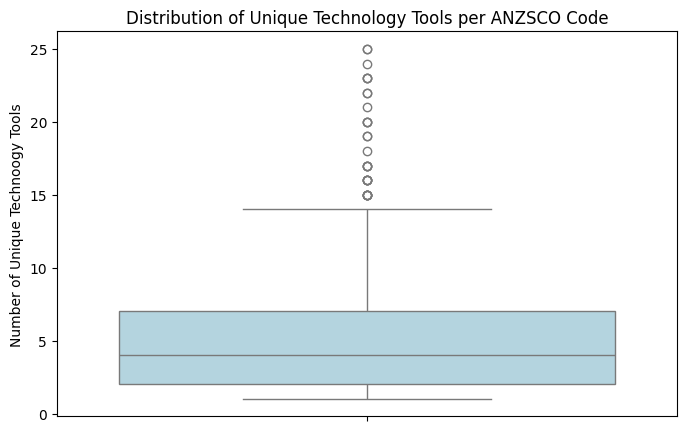

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby("ANZSCO Code")["Technology Tool"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")

# Show plot
plt.show()


In [157]:
# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = tt_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             database administrator   
1         2611                      ict business systems analysts   
2       262113                              systems administrator   
3       263111                  computer network systems engineer   
4       263212                               ict support engineer   
5         2621  database systems administrators ict security s...   
6       135199                                    network manager   
7       261111                               ict business analyst   
8       263112                              network administrator   
9       261313                                  software engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


In [158]:
import numpy as np

# Get counts of unique specialist tasks per ANZSCO Code
tt_counts = tt_df.groupby("ANZSCO Code")["Technology Tool"].nunique()

# Calculate IQR (Interquartile Range) to detect outliers
Q1 = np.percentile(tt_counts, 25)  # First quartile (25th percentile)
Q3 = np.percentile(tt_counts, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outliers as values greater than Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR
outliers = tt_counts[tt_counts > outlier_threshold].reset_index()

# Merge with ANZSCO Title to show meaningful names
top_outliers = outliers.merge(tt_df[["ANZSCO Code", "ANZSCO Title"]].drop_duplicates(), on="ANZSCO Code")

# Sort by number of specialist tasks and display top 10
top_outliers = top_outliers.sort_values(by="Technology Tool", ascending=False).head(10)
print(top_outliers)


    ANZSCO Code  Technology Tool  \
24       233999               25   
25       233999               25   
26       233999               25   
23       233999               25   
28       233999               25   
29       233999               25   
30       233999               25   
27       233999               25   
42       262111               25   
2          2611               24   

                                     ANZSCO Title  
24                           calibration engineer  
25                             corrosion engineer  
26                           fire safety engineer  
23                              acoustic engineer  
28                        product design engineer  
29                                safety engineer  
30  test activation engineer (naval shipbuilding)  
27                          mechatronics engineer  
42                         database administrator  
2                   ict business systems analysts  


### Merging Datasets

In [159]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:") 
    print(merged_df.head())
    return merged_df  


#c_merged_df = merge_all_dataframes(cc_desc_df, occupation_df, cc_df, "Core Competency", "ANZSCO Code")
tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Code")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Code")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  broadcasting audio-visual production technologies   
1  broadcasting audio-visual production technologies   
2  broadcasting audio-visual production technologies   
3  broadcasting audio-visual production technologies   
4  broadcasting audio-visual production technologies   

                Technology Tool Category Description  \
0  systems audio video multimedia news content pr...   
1  systems audio video multimedia news content pr...   
2  systems audio video multimedia news content pr...   
3  systems audio video multimedia news content pr...   
4  systems audio video multimedia news content pr...   

                           Technology Tool  \
0  collaborative news production platforms   
1  collaborative news production platforms   
2  collaborative news production platforms   
3  collaborative news production platforms   
4  collaborative news production platforms   

                   

In [160]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12911 entries, 0 to 12910
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12911 non-null  object
 1   Technology Tool Category Description  12911 non-null  object
 2   Technology Tool                       12911 non-null  object
 3   Technology Tool Description           12911 non-null  object
 4   Technology Tool Extended Description  12911 non-null  object
 5   Occupation Type_x                     12911 non-null  object
 6   ANZSCO Code                           12911 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12911 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  Occupation Type_y                     12906 non-null  object
 11  Sub-Profile Code_y          

In [161]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [162]:
def merge_cc_df(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df


cc_merged_df = merge_cc_df(cc_df, cc_desc_df, occupation_df)


Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          anzsco 6       422111                 NaN   
1          anzsco 6       422111                 NaN   
2          anzsco 6       422111                 NaN   
3          anzsco 6       422111                 NaN   
4          anzsco 6       422111                 NaN   

                                        ANZSCO Title        Core Competency  \
0  aboriginal torres strait islander education wo...     digital engagement   
1  aboriginal torres strait islander education wo...  initiative innovation   
2  aboriginal torres strait islander education wo...               learning   
3  aboriginal torres strait islander education wo...               numeracy   
4  aboriginal torres strait islander education wo...     oral communication   

   Score Proficiency Level                                       Anchor Value  \
0      5      intermediate  build maintain effective

In [163]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

### TT

In [164]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12911 entries, 0 to 12910
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12911 non-null  object
 1   Technology Tool Category Description  12911 non-null  object
 2   Technology Tool                       12911 non-null  object
 3   Technology Tool Description           12911 non-null  object
 4   Technology Tool Extended Description  12911 non-null  object
 5   Occupation Type_x                     12911 non-null  object
 6   ANZSCO Code                           12911 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12911 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  Occupation Type_y                     12906 non-null  object
 11  Sub-Profile Code_y          

In [165]:
tt_merged_df.drop(columns=[ "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Title_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code', 'Sub-Profile Code_x', 'ANZSCO Title_x',
       'Emerging/Trending Flag', 'ANZSCO Description'],
      dtype='object')

In [166]:
print("There are",tt_merged_df['Occupation Type_x'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_merged_df['Occupation Type_x'].unique())
print("There are",tt_merged_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['anzsco 4' 'anzsco 6' 'nec category occupation' 'specialisation']
There are 1042 different occupations listed


In [167]:
print("The number of Tech Tool Category in ASC data are:", tt_merged_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_merged_df['Technology Tool'].nunique())
#print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


In [168]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12911 entries, 0 to 12910
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12911 non-null  object
 1   Technology Tool Category Description  12911 non-null  object
 2   Technology Tool                       12911 non-null  object
 3   Technology Tool Description           12911 non-null  object
 4   Technology Tool Extended Description  12911 non-null  object
 5   Occupation Type_x                     12911 non-null  object
 6   ANZSCO Code                           12911 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12911 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  ANZSCO Description                    12906 non-null  object
dtypes: int64(1), object(10)
memo

In [169]:
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description
0,broadcasting audio-visual production technologies,systems audio video multimedia news content pr...,collaborative news production platforms,software used create manage news content media...,collaborative news production platforms encomp...,anzsco 4,2123,NaN,film television radio stage directors,NaN,film television radio stage directors direct a...
1,broadcasting audio-visual production technologies,systems audio video multimedia news content pr...,collaborative news production platforms,software used create manage news content media...,collaborative news production platforms encomp...,anzsco 4,2124,NaN,journalists writers,NaN,journalists writers research compile news stor...
2,broadcasting audio-visual production technologies,systems audio video multimedia news content pr...,collaborative news production platforms,software used create manage news content media...,collaborative news production platforms encomp...,anzsco 6,212113,NaN,radio presenter,NaN,prepares presents news sports information cond...
3,broadcasting audio-visual production technologies,systems audio video multimedia news content pr...,collaborative news production platforms,software used create manage news content media...,collaborative news production platforms encomp...,anzsco 6,212312,NaN,director (film television radio stage),NaN,interprets approves selection scripts directs ...
4,broadcasting audio-visual production technologies,systems audio video multimedia news content pr...,collaborative news production platforms,software used create manage news content media...,collaborative news production platforms encomp...,anzsco 6,212315,NaN,program director (television radio),NaN,compiles directs programs television radio.


In [170]:
tt_merged_df.sort_values(by="ANZSCO Code", inplace=True)
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description
2017,data analysis reporting platforms,software data analysis produce electronic reports,statistical data analysis software,software used support process analysing modell...,statistical data analysis software encompasses...,anzsco 4,1111,NaN,chief executives managing directors,NaN,chief executives managing directors determine ...
447,communication technologies,data voice and/or video communication platforms,audio/video conferencing software,software collaboration using video audio confe...,audio/video conferencing software enables peop...,anzsco 4,1111,NaN,chief executives managing directors,NaN,chief executives managing directors determine ...
8663,logistics fleet management systems,systems logistics vehicle despatch fleet manag...,procurement supply chain management systems,software used help manage production-to-custom...,procurement supply chain management encompasse...,anzsco 4,1111,NaN,chief executives managing directors,NaN,chief executives managing directors determine ...
9153,payroll human resource management platforms,systems undertake human resource management pe...,human resources software,software systems used manage employee human re...,human resources software encompasses software ...,anzsco 4,1111,NaN,chief executives managing directors,NaN,chief executives managing directors determine ...
3497,financial management service delivery platforms,systems undertake financial management reporti...,accounting financial management systems,software managing accounts inventory financial...,accounting financial management systems encomp...,anzsco 4,1111,NaN,chief executives managing directors,NaN,chief executives managing directors determine ...


### ST

In [171]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [172]:
st_merged_df.drop(columns=[ "Sub-Profile Code_y", "Specialist Cluster_y", "Cluster Family_y" , "ANZSCO Title_y", "Occupation Type_y", "Skill Statement" ], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title_x', 'Specialist Task', '% of time spent on task',
       'Emerging/\nTrending Flag', 'Specialist Cluster_x',
       ' % of time spent on cluster', 'Cluster Family_x',
       '% of time spent on family', 'Skills Statement', 'ANZSCO Description'],
      dtype='object')

In [173]:
print("The number of Specialist Task in ASC data are:", st_merged_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_merged_df['Specialist Cluster_x'].nunique())
print("The number of Cluster Families in ASC data are:", st_merged_df['Cluster Family_x'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 271
The number of Cluster Families in ASC data are: 30


In [174]:
print("There are",st_merged_df['Occupation Type_x'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_merged_df['Occupation Type_x'].unique())
print("There are",st_merged_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['anzsco 4' 'anzsco 6' 'specialisation' 'nec category occupation']
There are 1177 different occupations listed


In [175]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  ANZSCO Description           67772 non-null  object 
dtypes: float64(3), i

In [176]:
st_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Specialist Task,% of time spent on task,Emerging/\nTrending Flag,Specialist Cluster_x,% of time spent on cluster,Cluster Family_x,% of time spent on family,Skills Statement,ANZSCO Description
0,anzsco 4,1111,NaN,chief executives managing directors,direct manage financial activities operations,0.1302,NaN,manage monitor undertake financial activities,0.1644,business operations financial activities,0.5322,direct oversee financial operations business o...,chief executives managing directors determine ...
1,anzsco 4,1111,NaN,chief executives managing directors,direct department organisational activities,0.1117,trending,manage services staff activities,0.2128,business operations financial activities,0.5322,direct oversee activities work unit department...,chief executives managing directors determine ...
2,anzsco 4,1111,NaN,chief executives managing directors,direct sales marketing customer service activi...,0.0808,NaN,manage services staff activities,0.2128,business operations financial activities,0.5322,direct oversee sales marketing customer servic...,chief executives managing directors determine ...
3,anzsco 4,1111,NaN,chief executives managing directors,communicate others arrange coordinate conduct ...,0.0665,NaN,communicate collaborate others,0.0750,communication collaboration,0.0890,coordinate others order plan organise coordina...,chief executives managing directors determine ...
4,anzsco 4,1111,NaN,chief executives managing directors,analyse data assess operational project effect...,0.0651,NaN,use data inform operational decisions,0.1009,data analytics databases,0.1370,analyse qualitative quantitative data arising ...,chief executives managing directors determine ...


### CC

In [177]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

In [178]:
cc_merged_df.drop(columns=[ "Sub-Profile Code_y" , "Occupation Type_y"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description',
       'Proficiency Level_desc', 'Anchor Value_desc'],
      dtype='object')

In [179]:
cc_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description,Proficiency Level_desc,Anchor Value_desc
0,anzsco 6,422111,NaN,aboriginal torres strait islander education wo...,digital engagement,5,intermediate,build maintain effective online profile career...,assists aboriginal torres strait islander stud...,identifying using technology (including hardwa...,intermediate,build maintain effective online profile career...
1,anzsco 6,422111,NaN,aboriginal torres strait islander education wo...,initiative innovation,8,high,negotiate price sales terms prepare contract h...,assists aboriginal torres strait islander stud...,taking responsibilities challenges able start ...,high,negotiate price sales terms prepare contract h...
2,anzsco 6,422111,NaN,aboriginal torres strait islander education wo...,learning,5,intermediate,learn new filing system groups documents type ...,assists aboriginal torres strait islander stud...,understanding implications new information cur...,intermediate,learn new filing system groups documents type ...
3,anzsco 6,422111,NaN,aboriginal torres strait islander education wo...,numeracy,4,intermediate,use blood pressure machine accurately record r...,assists aboriginal torres strait islander stud...,using mathematics solve problems interpreting ...,intermediate,use blood pressure machine accurately record r...
4,anzsco 6,422111,NaN,aboriginal torres strait islander education wo...,oral communication,7,intermediate,participate work meeting ask appropriate follo...,assists aboriginal torres strait islander stud...,ability communicate information ideas speaking...,intermediate,participate work meeting ask appropriate follo...


In [180]:
print(cc_merged_df['Core Competency'].nunique())
print(cc_merged_df['Core Competency'].unique())

10
['digital engagement' 'initiative innovation' 'learning' 'numeracy'
 'oral communication' 'planning organising' 'problem solving' 'reading'
 'teamwork' 'writing']


In [181]:
print("There are",cc_merged_df['Occupation Type_x'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_merged_df['Occupation Type_x'].unique())
print("There are",cc_merged_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['anzsco 6' 'anzsco 4']
There are 1101 different occupations listed


In [182]:
cc_counts = cc_merged_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


### TT

In [183]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12911 entries, 2017 to 210
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12911 non-null  object
 1   Technology Tool Category Description  12911 non-null  object
 2   Technology Tool                       12911 non-null  object
 3   Technology Tool Description           12911 non-null  object
 4   Technology Tool Extended Description  12911 non-null  object
 5   Occupation Type_x                     12911 non-null  object
 6   ANZSCO Code                           12911 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12911 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  ANZSCO Description                    12906 non-null  object
dtypes: int64(1), object(10)
memory u

"""Technology Tool Category → Category of technology tools
Technology Tool Category Description → Describes tool category
Technology Tool → Actual tool name
Technology Tool Description → Short description
Technology Tool Extended Description → More details on tool
ANZSCO Title_x → Occupation title
ANZSCO Description → Description of the occupation"""

In [185]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12911 entries, 2017 to 210
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12911 non-null  object
 1   Technology Tool Category Description  12911 non-null  object
 2   Technology Tool                       12911 non-null  object
 3   Technology Tool Description           12911 non-null  object
 4   Technology Tool Extended Description  12911 non-null  object
 5   Occupation Type_x                     12911 non-null  object
 6   ANZSCO Code                           12911 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12911 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  ANZSCO Description                    12906 non-null  object
dtypes: int64(1), object(10)
memory u

In [ ]:
text_columns = [
    "Technology Tool Category",
    "Technology Tool Category Description",
    "Technology Tool",
    "Technology Tool Description",
    "Technology Tool Extended Description",
    "ANZSCO Title_x",
    "ANZSCO Description"
]


def tokenize(text):
    tokens = word_tokenize(text)  # Tokenize
    return tokens

# Apply tokenization to selected columns
for col in text_columns:
    tt_merged_df[col + "_tokens"] = df[col].apply(tokenize)

# Display first few rows of tokenized DataFrame
print(tt_merged_df.head())


KeyError: 'Technology Tool Category'